## 1. Setup and Load Data

In [2]:
import tensorflow as tf

In [3]:
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [5]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Removing the Dirty Images And Some Ploting

In [32]:
import cv2
import imghdr

In [10]:
data_dir = 'data'

In [13]:
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [17]:
os.listdir(os.path.join(data_dir, 'happy'))

'data/happy'

In [33]:
im_path = os.path.join(data_dir, 'happy', os.listdir(os.path.join(data_dir, 'happy'))[1])
im = imghdr.what(im_path)
im

'jpeg'

In [34]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in the ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in the ext list data/sad/depositphotos_9980774-stock-photo-sad-lonely-pensive-old-senior.jpg
Image not in the ext list data/sad/vector13.svg
Image not in the ext list data/sad/depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg
Image not in the ext list data/sad/vector7.svg
Image not in the ext list data/sad/vector6.svg
Image not in the ext list data/sad/vector8.svg
Image not in the ext list data/sad/vector10.svg
Image not in the ext list data/sad/depositphotos_469568274-stock-photo-group-sad-people-go-social.jpg
Image not in the ext list data/sad/5TRX6BRpc.gif
Image not in the ext list data/sad/vector3.svg
Image not in the ext list data/sad/vector.svg
Image not in the ext list data/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in the ext list data/sad/vector5.svg
Image not in the ext list data/sad/vector12.svg
Image not in the ext list data/sad/vector4.svg
Image not in the ext list data/sad/vector2.svg
Image not in the ext list data/sa

## Load Data


In [27]:
tf.data.Dataset??

In [35]:
import numpy as np
from matplotlib import pyplot as plt

In [36]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 584 files belonging to 2 classes.


In [37]:
data_iterator = data.as_numpy_iterator()

In [38]:
data_iterator


In [39]:
batch = data_iterator.next()

In [40]:
len(batch)


2

In [41]:
# Class 1 = Sad People
# Class 0 = Happy People
batch[1]

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int32)

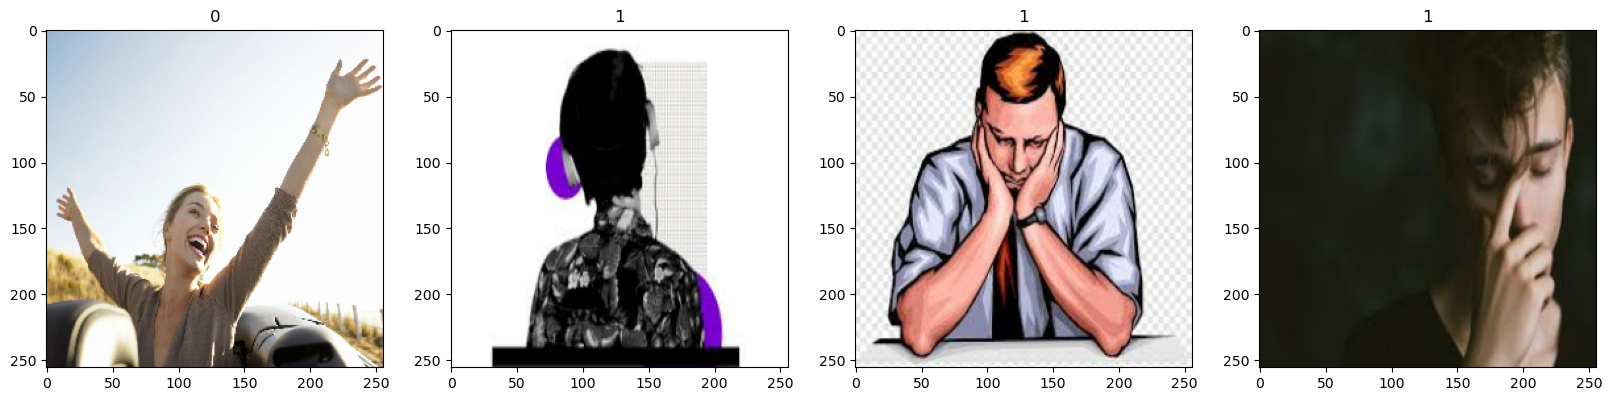

In [42]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocess Data

In [43]:
# Scale Data
data = data.map(lambda x, y: (x/255, y))

In [44]:
scaled_iterator = data.as_numpy_iterator()

In [45]:
batch = scaled_iterator.next()

In [46]:
# Split Data to Training, Test and Validate set
len(data)

19

In [47]:
train_count = int(len(data)*.7)
val_count = int(len(data)*.2)
test_count = int(len(data)*.1)+1

In [48]:
train = data.take(train_count)
val = data.skip(train_count).take(val_count)
test = data.skip(train_count+val_count).take(test_count)

In [50]:
len(train)

13

## Deep Learning Sequential Model 

Build Deep Learning Model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [52]:
model = Sequential()

In [53]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Training the model

In [56]:
log_dir = 'logs'

In [58]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [59]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
13/13 [==============================] - 7s 399ms/step - loss: 0.9522 - accuracy: 0.4928 - val_loss: 0.6972 - val_accuracy: 0.5312
Epoch 2/20
13/13 [==============================] - 6s 396ms/step - loss: 0.6213 - accuracy: 0.6562 - val_loss: 0.4979 - val_accuracy: 0.7604
Epoch 3/20
13/13 [==============================] - 6s 389ms/step - loss: 0.4649 - accuracy: 0.7668 - val_loss: 0.4466 - val_accuracy: 0.7708
Epoch 4/20
13/13 [==============================] - 6s 389ms/step - loss: 0.3463 - accuracy: 0.8534 - val_loss: 0.2962 - val_accuracy: 0.8542
Epoch 5/20
13/13 [==============================] - 6s 395ms/step - loss: 0.2719 - accuracy: 0.8870 - val_loss: 0.1903 - val_accuracy: 0.9271
Epoch 6/20
13/13 [==============================] - 6s 391ms/step - loss: 0.2270 - accuracy: 0.9087 - val_loss: 0.1710 - val_accuracy: 0.9167
Epoch 7/20
13/13 [==============================] - 6s 392ms/step - loss: 0.1702 - accuracy: 0.9375 - val_loss: 0.1065 - val_accuracy: 0.9583
Epoch 

## Performance Plot

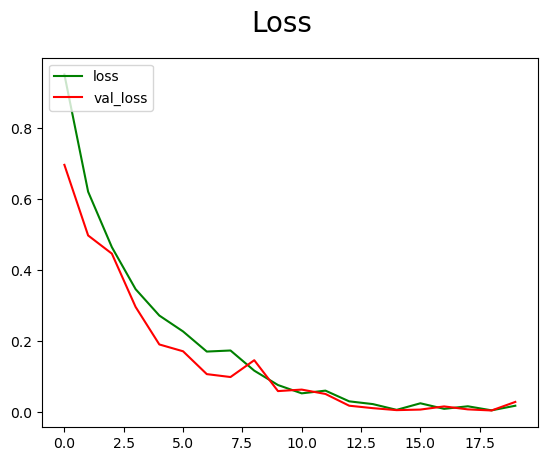

In [60]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='green', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

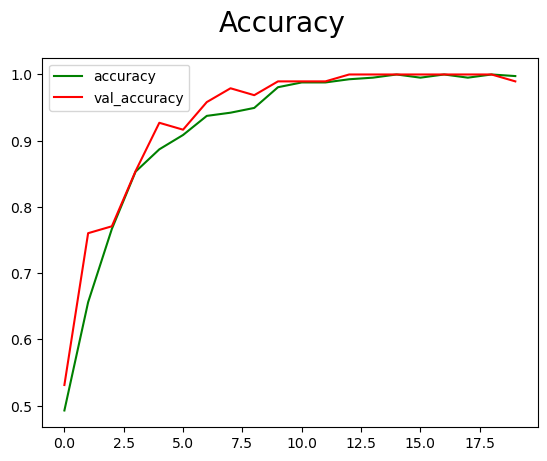

In [61]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Evaluate the performance of Model

In [62]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [63]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [64]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 63ms/step


In [65]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:1.0, Recall: 0.9655172228813171, Accuracy: 0.984375


## Testing Model Unseen Data

In [66]:
import cv2

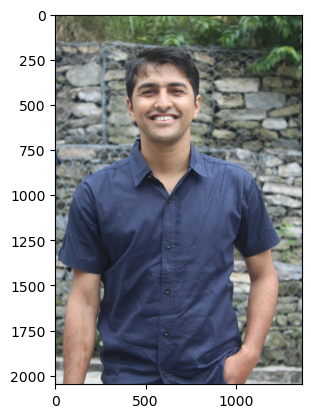

In [101]:
img = cv2.imread('dai_smile.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

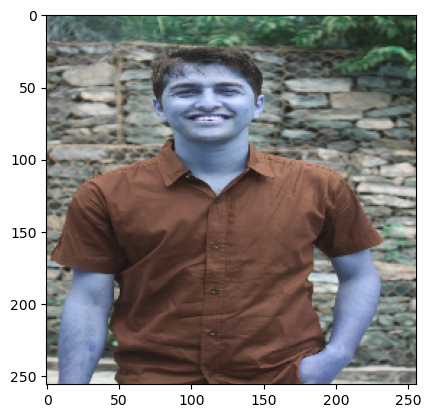

In [102]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [103]:
# Prediction done by creating a batch using numpy
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 13ms/step


In [104]:
yhat[0][0]

0.16412914

In [105]:
if yhat[0][0] > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy


## Save The Model

In [106]:
from tensorflow.keras.models import load_model

In [107]:
model.save(os.path.join('models', 'happysadmodel.h5'))

/home/daphe/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [108]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [109]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 44ms/step


In [110]:
if yhat_new > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy
